In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time

# Import Pandas, Matplotlib and Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
# Firefox deiver path
firefoxpath = r"./geckodriver"

# Wuzzuf link
wuzzuf_page = "https://wuzzuf.net/jobs/egypt"

# Job name
job = 'machine learning engineer'

In [3]:
option = webdriver.FirefoxOptions()

option.add_argument("–disk-cache-size=3000000000") # OPTIONAL

# Firefox
driver = webdriver.Firefox(executable_path=firefoxpath)

driver.get(wuzzuf_page)
time.sleep(3)

In [4]:
search_job = driver.find_element_by_css_selector("input[class='search-bar-input']")
search_job.send_keys(job)

search_button = driver.find_element_by_css_selector("button[class='btn btn-primary search-btn']")
search_button.click()
time.sleep(3)

In [5]:
all_skils = []
all_year_of_exp = []

In [6]:
for _ in range(3):
    all_jobs = driver.find_elements_by_css_selector("div[class='css-1gatmva e1v1l3u10']")
    main_page_url = driver.current_url
    job_links = []
    
    for job in all_jobs:
        job_link = job.find_element_by_css_selector("a[class='css-o171kl']").get_attribute("href")
        job_links.append(job_link)
    
    for job_link in job_links:
        driver.get(job_link)
        time.sleep(3)
        
        # driver.execute_script("window.scrollBy(0,500)")
        
        skils_per_job = driver.find_element_by_xpath("/html/body/div[1]/div/main/article/section[2]/div[6]").text.split('\n')
        del skils_per_job[0]

        YrsofExp = driver.find_element_by_xpath('/html/body/div[1]/div/main/article/section[2]/div[1]').text.split('\n')
        YrsofExp = YrsofExp[1]

        all_skils.append(skils_per_job)
        all_year_of_exp.append(YrsofExp)
      
    driver.get(main_page_url)
    time.sleep(3)
    
    next_buton = driver.find_element_by_xpath("/html/body/div[1]/div/div[3]/div/div/div[3]/ul/li[5]/button")
    next_buton.click()
    time.sleep(5)

In [7]:
def flatten(jobs_skils):
    return [skil for job_skils in jobs_skils for skil in job_skils]

In [8]:
print('Count of ML jobs: ', len(all_skils))

Count of ML jobs:  44


In [9]:
unique_skils = set(flatten(all_skils))

In [10]:
print('Count of unique skils in ML jobs: ', len(unique_skils))
print('Unique skils in ML jobs: ', unique_skils, sep =  '\n')

Count of unique skils in ML jobs:  220
Unique skils in ML jobs: 
{'OpenCV', 'Maintenance', 'MBA', 'Image Processing', 'Data Analysis', 'English', 'Engineering', 'Docker', 'coding', 'APEX', 'Production Engineering', 'Big Data', 'Adobe Photoshop', 'Manufacturing', 'Data', 'Adobe Indesign', 'Machine Learning', 'computer', 'Unit Testing', 'Data Warehousing', 'ITK', 'TensorFlow', 'Data Scientist', 'OLAP', 'Electrical Engineering', 'Visualization', 'Angular', 'Analytics', 'Welding', 'Professional Scrum Master', 'SSIS', 'NodeJS', 'PyTorch', 'DBT', 'Applied Arts', 'C++', 'GPU Programming', 'Robust', '3D Printing', 'Data Engineering', 'Fabrication', 'Mathematics', 'Communication skills', 'Deep Learning', 'DevOps', 'Application Security', 'TOGAF', 'Development', 'Technical', 'Engineering - Telecom/Technology', 'Engineering - Mechanical/Electrical', 'Consultant for Communication & Collaboration', 'Social Media', 'Clustering', 'MySQL', 'Data Management', 'Problem Solving', 'Testing', 'Microcontrol

In [11]:
print('All skils in ML jobs: ', len(flatten(all_skils)))

All skils in ML jobs:  606


In [12]:
skils_dic = {"Skils": flatten(all_skils)}

In [13]:
skils_df = pd.DataFrame(skils_dic)

In [21]:
dropped_skils = ['Computer Science', 'Information Technology (IT)','Engineering', 'Software Development',
                 'Computer Engineering', 'Software', 'Programming', 'Science', 'Data', 'Software Engineering',
                 'Data Science', 'Design']

In [22]:
skils_count = skils_df['Skils'].value_counts().sort_values(ascending=False).drop(dropped_skils, axis = 0).head(20)

In [23]:
skils_count = pd.DataFrame(skils_count).reset_index()
skils_count.columns = ['Skils', 'Skil_count']
skils_count.head() # Top 5 Skils required 

,Skils,Skil_count
0,Python,24
1,Machine Learning,21
2,SQL,18
3,Mathematics,8
4,Statistics,7


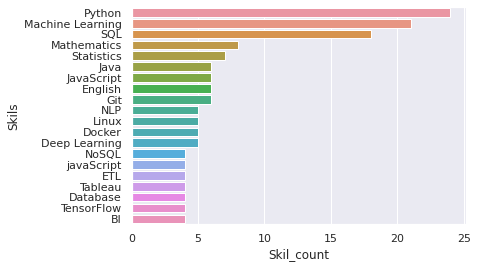

In [24]:
# Create bar plot with all_skils on the y-axis
sns.barplot(y='Skils', x='Skil_count', data=skils_count)

# Show plot
plt.show()

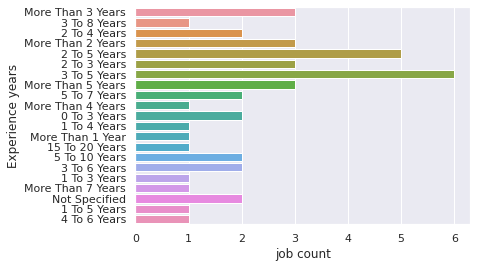

In [20]:
# Create count plot with Experience year on the y-axis
sns.countplot(y=all_year_of_exp)
plt.xlabel('job count')
plt.ylabel('Experience years')

# Show plot
plt.show()